# STA5737 Applied Analytics for Businesss - Individual Project

## Kaggle Dataset "Airline Loyalty Campaign Program Impact on Flights"
https://www.kaggle.com/datasets/agungpambudi/airline-loyalty-campaign-program-impact-on-flights/  

**GitHub:** https://github.com/RAScheepmaker/STA5737-Applied-Analytics-Project 

*This dataset contains customer demographics and flight booking activity between 2017-2018 from Canadian members of an airline loyalty program.*

*The dataset consists of two separate csv files:*

*1. The demographics file ("CustomerLoyaltyHistory.csv") contains information on customer's location, gender, marital status, education, salary, and loyalty status with the airline (type of status, customer lifetime value, enrollment and cancellation dates and whether they enrolled as part of a 2018 promotion).*
  
*2. The flights booking file ("CustomerFlightActivity.csv") contains monthly data on the number and distances of flights booked, either for themselves or with a companions. It also contains data on the number of points earned and redeemed.*

*The original goal of this dataset was to study the impact of the Airline Loyalty Campaign. For example, how did the bookings of customers who enrolled as part of the promotional campaign differ from regular loyal customers?*

## Reading, Joining, and Cleaning the Data

In [203]:
# Clear workspace.
rm(list=ls(all=TRUE))

# install.packages('sqldf')
library(sqldf)

In [204]:
# Load the flights data into a dataframe
flights <- read.csv('../Data/CustomerFlightActivity.csv', header=TRUE)
dim(flights)

# Print the total amount of 'NA's in the data
sum(is.na(flights))

[1] 405624     10

[1] 0

In [205]:
head(flights)
str(flights)

,Loyalty.Number,Year,Month,Flights.Booked,Flights.with.Companions,Total.Flights,Distance,Points.Accumulated,Points.Redeemed,Dollar.Cost.Points.Redeemed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
1,100018,2017,1,3,0,3,1521,152,0,0
2,100102,2017,1,10,4,14,2030,203,0,0
3,100140,2017,1,6,0,6,1200,120,0,0
4,100214,2017,1,0,0,0,0,0,0,0
5,100272,2017,1,0,0,0,0,0,0,0
6,100301,2017,1,0,0,0,0,0,0,0


'data.frame':	405624 obs. of  10 variables:
 $ Loyalty.Number             : int  100018 100102 100140 100214 100272 100301 100364 100380 100428 100504 ...
 $ Year                       : int  2017 2017 2017 2017 2017 2017 2017 2017 2017 2017 ...
 $ Month                      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Flights.Booked             : int  3 10 6 0 0 0 0 0 6 0 ...
 $ Flights.with.Companions    : int  0 4 0 0 0 0 0 0 0 0 ...
 $ Total.Flights              : int  3 14 6 0 0 0 0 0 6 0 ...
 $ Distance                   : int  1521 2030 1200 0 0 0 0 0 606 0 ...
 $ Points.Accumulated         : num  152 203 120 0 0 0 0 0 60 0 ...
 $ Points.Redeemed            : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Dollar.Cost.Points.Redeemed: int  0 0 0 0 0 0 0 0 0 0 ...


In [206]:
tail(flights)

,Loyalty.Number,Year,Month,Flights.Booked,Flights.with.Companions,Total.Flights,Distance,Points.Accumulated,Points.Redeemed,Dollar.Cost.Points.Redeemed
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>
405619,999891,2018,12,0,0,0,0,0,0,0
405620,999902,2018,12,0,0,0,0,0,0,0
405621,999911,2018,12,0,0,0,0,0,0,0
405622,999940,2018,12,3,0,3,1233,123,0,0
405623,999982,2018,12,0,0,0,0,0,0,0
405624,999986,2018,12,0,0,0,0,0,0,0


*The flights data contains monthly booking data for every customer between January 2017 and December 2018, without any NAs. I will later aggregate this data into total numbers for each customer and then join those totals to the Customer Loyalty dataset.*

In [207]:
loyalty <- read.csv('../Data/CustomerLoyaltyHistory.csv', header=TRUE)
dim(loyalty)
sum(is.na(loyalty))

[1] 16737    16

[1] 33578

In [208]:
head(loyalty)
str(loyalty)

,Loyalty.Number,Country,Province,City,Postal.Code,Gender,Education,Salary,Marital.Status,Loyalty.Card,CLV,Enrollment.Type,Enrollment.Year,Enrollment.Month,Cancellation.Year,Cancellation.Month
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<int>,<int>,<int>,<int>
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236,Married,Star,3839.14,Standard,2016,2,NA,NA
2,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NA,Divorced,Star,3839.61,Standard,2016,3,NA,NA
3,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NA,Single,Star,3839.75,Standard,2014,7,2018,1
4,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NA,Single,Star,3839.75,Standard,2013,2,NA,NA
5,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495,Married,Star,3842.79,Standard,2014,10,NA,NA
6,193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124,Married,Star,3844.57,Standard,2012,5,NA,NA


'data.frame':	16737 obs. of  16 variables:
 $ Loyalty.Number    : int  480934 549612 429460 608370 530508 193662 927943 188893 852392 866307 ...
 $ Country           : chr  "Canada" "Canada" "Canada" "Canada" ...
 $ Province          : chr  "Ontario" "Alberta" "British Columbia" "Ontario" ...
 $ City              : chr  "Toronto" "Edmonton" "Vancouver" "Toronto" ...
 $ Postal.Code       : chr  "M2Z 4K1" "T3G 6Y6" "V6E 3D9" "P1W 1K4" ...
 $ Gender            : chr  "Female" "Male" "Male" "Male" ...
 $ Education         : chr  "Bachelor" "College" "College" "College" ...
 $ Salary            : int  83236 NA NA NA 103495 51124 NA 100159 100159 100159 ...
 $ Marital.Status    : chr  "Married" "Divorced" "Single" "Single" ...
 $ Loyalty.Card      : chr  "Star" "Star" "Star" "Star" ...
 $ CLV               : num  3839 3840 3840 3840 3843 ...
 $ Enrollment.Type   : chr  "Standard" "Standard" "Standard" "Standard" ...
 $ Enrollment.Year   : int  2016 2016 2014 2013 2014 2012 2014 2016 2015 201

*This Customer Loyalty data contains more NAs, specifically for Salary and when the customer did not cancel yet. This cancelation data is important though, so we cannot just remove all rows with NAs. I will look into NAs later in more detail. I also notice that some column names include a period "." in the name, which might give problems, so let's first rename all column names and then merge the two files into a single dataframe.*

In [209]:
# Original Names
colnames(flights)
colnames(loyalty)

[1] "Loyalty.Number"              "Year"                       
 [3] "Month"                       "Flights.Booked"             
 [5] "Flights.with.Companions"     "Total.Flights"              
 [7] "Distance"                    "Points.Accumulated"         
 [9] "Points.Redeemed"             "Dollar.Cost.Points.Redeemed"

[1] "Loyalty.Number"     "Country"            "Province"          
 [4] "City"               "Postal.Code"        "Gender"            
 [7] "Education"          "Salary"             "Marital.Status"    
[10] "Loyalty.Card"       "CLV"                "Enrollment.Type"   
[13] "Enrollment.Year"    "Enrollment.Month"   "Cancellation.Year" 
[16] "Cancellation.Month"

In [210]:
# Remove the "." from all column names
colnames(flights) <- c("LoyaltyNumber", "Year", "Month", "FlightsBooked","FlightsWithCompanions","TotalFlights","Distance","PointsAccumulated","PointsRedeemed","DollarCostPointsRedeemed")
colnames(loyalty) <- c("LoyaltyNumber","Country","Province","City","PostalCode","Gender","Education","Salary","MaritalStatus","LoyaltyCard","CLV","EnrollmentType","EnrollmentYear","EnrollmentMonth","CancellationYear","CancellationMonth")

In [211]:
# Checking the result
colnames(flights)
colnames(loyalty)

[1] "LoyaltyNumber"            "Year"                    
 [3] "Month"                    "FlightsBooked"           
 [5] "FlightsWithCompanions"    "TotalFlights"            
 [7] "Distance"                 "PointsAccumulated"       
 [9] "PointsRedeemed"           "DollarCostPointsRedeemed"

[1] "LoyaltyNumber"     "Country"           "Province"         
 [4] "City"              "PostalCode"        "Gender"           
 [7] "Education"         "Salary"            "MaritalStatus"    
[10] "LoyaltyCard"       "CLV"               "EnrollmentType"   
[13] "EnrollmentYear"    "EnrollmentMonth"   "CancellationYear" 
[16] "CancellationMonth"

In [212]:
length(unique(flights$LoyaltyNumber))
length(unique(loyalty$LoyaltyNumber))

[1] 16737

[1] 16737

*Both files have 16737 unique Loyalty Numbers.*

*To limit the amount of data and make our analysis a bit simpler, let's join only aggregate data from the Flights data with the Loyalty data using an SQL inner join. We will also remove some columns we will not use, such as "Country" (which is Canada for all customers) and "PostalCode".*

In [213]:
data <- sqldf('
SELECT 
  loyalty.LoyaltyNumber as Customer,
  loyalty.Province as Province,
  loyalty.City as City,
  loyalty.Gender as Gender,
  loyalty.Education as Education,
  loyalty.Salary as Salary,
  loyalty.MaritalStatus as MaritalStatus,
  loyalty.LoyaltyCard as LoyaltyCard,
  loyalty.CLV as CLV,
  loyalty.EnrollmentType as EnrollmentType,
  loyalty.EnrollmentYear as EnrollmentYear,
  loyalty.EnrollmentMonth as EnrollmentMonth,
  loyalty.CancellationYear as CancellationYear,
  loyalty.CancellationMonth as CancellationMonth,
  SUM(flights.FlightsBooked) as TotalSoloFlights,
  SUM(flights.FlightsWithCompanions) as TotalCompanionFlights,
  SUM(flights.TotalFlights) as TotalFlights,
  SUM(flights.Distance) as TotalDistance,
  SUM(flights.PointsAccumulated) as TotalPointsAccumulated,
  SUM(flights.PointsRedeemed) as TotalPointsRedeemed,
  SUM(flights.DollarCostPointsRedeemed) as TotalDollarCostPointsRedeemed
FROM 
  flights
INNER JOIN 
  loyalty
ON 
  loyalty.LoyaltyNumber = flights.LoyaltyNumber
GROUP BY
  Customer
;')

# In case you need a full join:
#
# all_df <- sqldf('
# SELECT 
#   * 
# FROM 
#   flights
# INNER JOIN 
#   loyalty
# ON 
#   flights.LoyaltyNumber = loyalty.LoyaltyNumber
# ;')
#
# Write the resulting dataframe to output .csv file
# write.csv(head(all_df, n=100), file = '../Data/All_Output_Sample.csv')

In [214]:
str(data)

'data.frame':	16737 obs. of  21 variables:
 $ Customer                     : int  100018 100102 100140 100214 100272 100301 100364 100380 100428 100504 ...
 $ Province                     : chr  "Alberta" "Ontario" "British Columbia" "British Columbia" ...
 $ City                         : chr  "Edmonton" "Toronto" "Dawson Creek" "Vancouver" ...
 $ Gender                       : chr  "Female" "Male" "Female" "Male" ...
 $ Education                    : chr  "Bachelor" "College" "College" "Bachelor" ...
 $ Salary                       : int  92552 NA NA 63253 91163 70323 76849 69695 63478 75638 ...
 $ MaritalStatus                : chr  "Married" "Single" "Divorced" "Married" ...
 $ LoyaltyCard                  : chr  "Aurora" "Nova" "Nova" "Star" ...
 $ CLV                          : num  7919 2888 2838 4171 6622 ...
 $ EnrollmentType               : chr  "Standard" "Standard" "Standard" "Standard" ...
 $ EnrollmentYear               : int  2016 2013 2016 2015 2014 2013 2015 2012 2012 

Let's first convert the categorical data to factors:

In [215]:
data$Gender = as.factor(data$Gender)
data$Education = as.factor(data$Education)
data$MaritalStatus = as.factor(data$MaritalStatus)
data$LoyaltyCard = as.factor(data$LoyaltyCard)
data$EnrollmentType = as.factor(data$EnrollmentType)
data$EnrollmentYear = as.factor(data$EnrollmentYear)
data$EnrollmentMonth = as.factor(data$EnrollmentMonth)

In [216]:
# Checking if there are more columns with NAs
for (name in colnames(data)){
        print(paste(name,sum(is.na(data[name]))))
    }

[1] "Customer 0"
[1] "Province 0"
[1] "City 0"
[1] "Gender 0"
[1] "Education 0"
[1] "Salary 4238"
[1] "MaritalStatus 0"
[1] "LoyaltyCard 0"
[1] "CLV 0"
[1] "EnrollmentType 0"
[1] "EnrollmentYear 0"
[1] "EnrollmentMonth 0"
[1] "CancellationYear 14670"
[1] "CancellationMonth 14670"
[1] "TotalSoloFlights 0"
[1] "TotalCompanionFlights 0"
[1] "TotalFlights 0"
[1] "TotalDistance 0"
[1] "TotalPointsAccumulated 0"
[1] "TotalPointsRedeemed 0"
[1] "TotalDollarCostPointsRedeemed 0"


*Only Salary, CancellationYear and CancellationMonth contain NAs. Let's first deal with the Cancellations and then remove all rows with missing Salary (this is about a quarter of all the data, but we should still have more than 10000 rows left, which should be okay for this project).*

In [217]:
# Add a "Canceled" column if at any point in time a membership was canceled
data$Canceled = as.integer(!is.na(data$CancellationYear))

In [218]:
# Now we can remove the CancellationYear and CancellationMonth columns (columns 13, 14)
str(data)
data <- data[,-c(13,14)]

'data.frame':	16737 obs. of  22 variables:
 $ Customer                     : int  100018 100102 100140 100214 100272 100301 100364 100380 100428 100504 ...
 $ Province                     : chr  "Alberta" "Ontario" "British Columbia" "British Columbia" ...
 $ City                         : chr  "Edmonton" "Toronto" "Dawson Creek" "Vancouver" ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 2 1 2 1 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 2 2 1 1 1 1 1 1 1 ...
 $ Salary                       : int  92552 NA NA 63253 91163 70323 76849 69695 63478 75638 ...
 $ MaritalStatus                : Factor w/ 3 levels "Divorced","Married",..: 2 3 1 2 1 1 2 3 2 1 ...
 $ LoyaltyCard                  : Factor w/ 3 levels "Aurora","Nova",..: 1 2 2 3 3 2 2 3 1 2 ...
 $ CLV                          : num  7919 2888 2838 4171 6622 ...
 $ EnrollmentType               : Factor w/ 2 levels "2018 Promotion",..: 2 2 2 2 2 2 2 2 2 

In [219]:
str(data)

'data.frame':	16737 obs. of  20 variables:
 $ Customer                     : int  100018 100102 100140 100214 100272 100301 100364 100380 100428 100504 ...
 $ Province                     : chr  "Alberta" "Ontario" "British Columbia" "British Columbia" ...
 $ City                         : chr  "Edmonton" "Toronto" "Dawson Creek" "Vancouver" ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 2 1 2 1 2 2 1 2 1 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 2 2 1 1 1 1 1 1 1 ...
 $ Salary                       : int  92552 NA NA 63253 91163 70323 76849 69695 63478 75638 ...
 $ MaritalStatus                : Factor w/ 3 levels "Divorced","Married",..: 2 3 1 2 1 1 2 3 2 1 ...
 $ LoyaltyCard                  : Factor w/ 3 levels "Aurora","Nova",..: 1 2 2 3 3 2 2 3 1 2 ...
 $ CLV                          : num  7919 2888 2838 4171 6622 ...
 $ EnrollmentType               : Factor w/ 2 levels "2018 Promotion",..: 2 2 2 2 2 2 2 2 2 

In [220]:
# Remove remaining NAs
data <- na.omit(data)
str(data)

'data.frame':	12499 obs. of  20 variables:
 $ Customer                     : int  100018 100214 100272 100301 100364 100380 100428 100504 100550 100585 ...
 $ Province                     : chr  "Alberta" "British Columbia" "Ontario" "Ontario" ...
 $ City                         : chr  "Edmonton" "Vancouver" "Toronto" "Toronto" ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 1 2 1 1 2 ...
 $ Education                    : Factor w/ 5 levels "Bachelor","College",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Salary                       : int  92552 63253 91163 70323 76849 69695 63478 75638 54133 96269 ...
 $ MaritalStatus                : Factor w/ 3 levels "Divorced","Married",..: 2 2 1 1 2 3 2 1 2 1 ...
 $ LoyaltyCard                  : Factor w/ 3 levels "Aurora","Nova",..: 1 3 3 2 2 3 1 2 2 3 ...
 $ CLV                          : num  7919 4171 6622 48357 5144 ...
 $ EnrollmentType               : Factor w/ 2 levels "2018 Promotion",..: 2 2 2 2 2 2 2 2 2 2 ...
 

In [221]:
summary(data)

    Customer        Province             City              Gender    
 Min.   :100018   Length:12499       Length:12499       Female:6326  
 1st Qu.:325434   Class :character   Class :character   Male  :6173  
 Median :551248   Mode  :character   Mode  :character                
 Mean   :549945                                                      
 3rd Qu.:773824                                                      
 Max.   :999986                                                      
                                                                     
                Education         Salary        MaritalStatus  LoyaltyCard  
 Bachelor            :10475   Min.   :-58486   Divorced:2142   Aurora:2635  
 College             :    0   1st Qu.: 59246   Married :8299   Nova  :4339  
 Doctor              :  734   Median : 73455   Single  :2058   Star  :5525  
 High School or Below:  782   Mean   : 79246                                
 Master              :  508   3rd Qu.: 88518           

I see that Salary has negative values. Let's also remove those:

In [222]:
# Remove negative Salary 
data <- data[which(data$Salary > 0), ]

In [223]:
summary(data)

    Customer        Province             City              Gender    
 Min.   :100018   Length:12479       Length:12479       Female:6316  
 1st Qu.:325544   Class :character   Class :character   Male  :6163  
 Median :551429   Mode  :character   Mode  :character                
 Mean   :550075                                                      
 3rd Qu.:773900                                                      
 Max.   :999986                                                      
                                                                     
                Education         Salary        MaritalStatus  LoyaltyCard  
 Bachelor            :10456   Min.   : 15609   Divorced:2140   Aurora:2632  
 College             :    0   1st Qu.: 59265   Married :8284   Nova  :4330  
 Doctor              :  734   Median : 73510   Single  :2055   Star  :5517  
 High School or Below:  781   Mean   : 79430                                
 Master              :  508   3rd Qu.: 88600           

In [224]:
prop.table(table(data$Canceled))


        0         1 
0.8767529 0.1232471 

*We see that 12% of the members have canceled their membership at any point between 2012 and 2018.*

## Visual Data Exploration

### Histograms

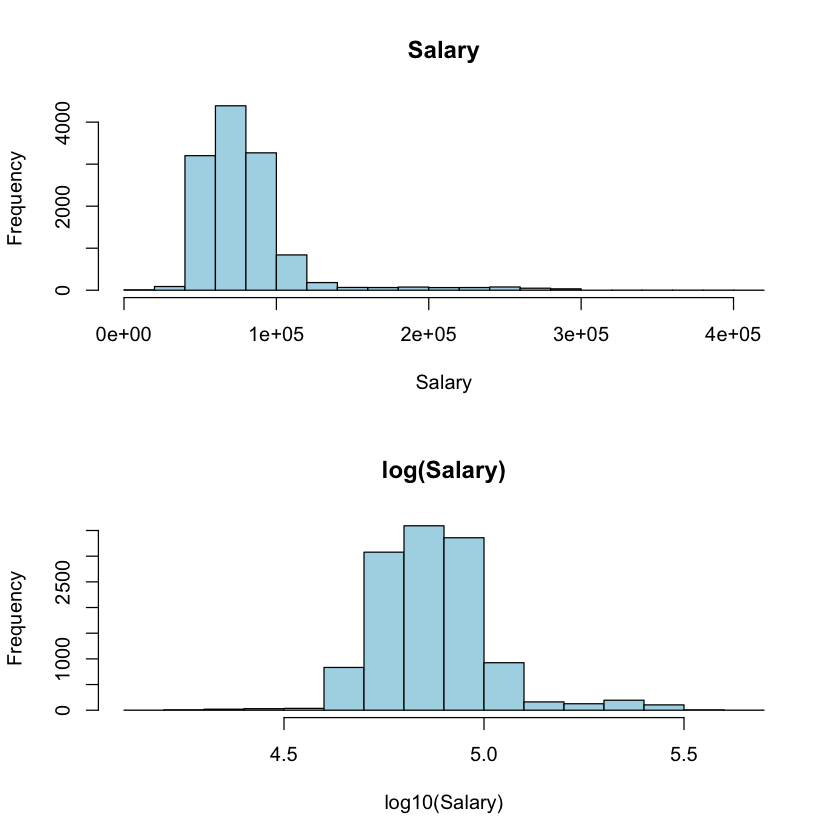

In [225]:
opar <- par(no.readonly=TRUE)
par(mfrow=c(2,1))
hist(data$Salary, col='lightblue', main='Salary', xlab='Salary')
hist(log10(data$Salary), col='lightblue', main='log(Salary)', xlab='log10(Salary)')
par(opar)

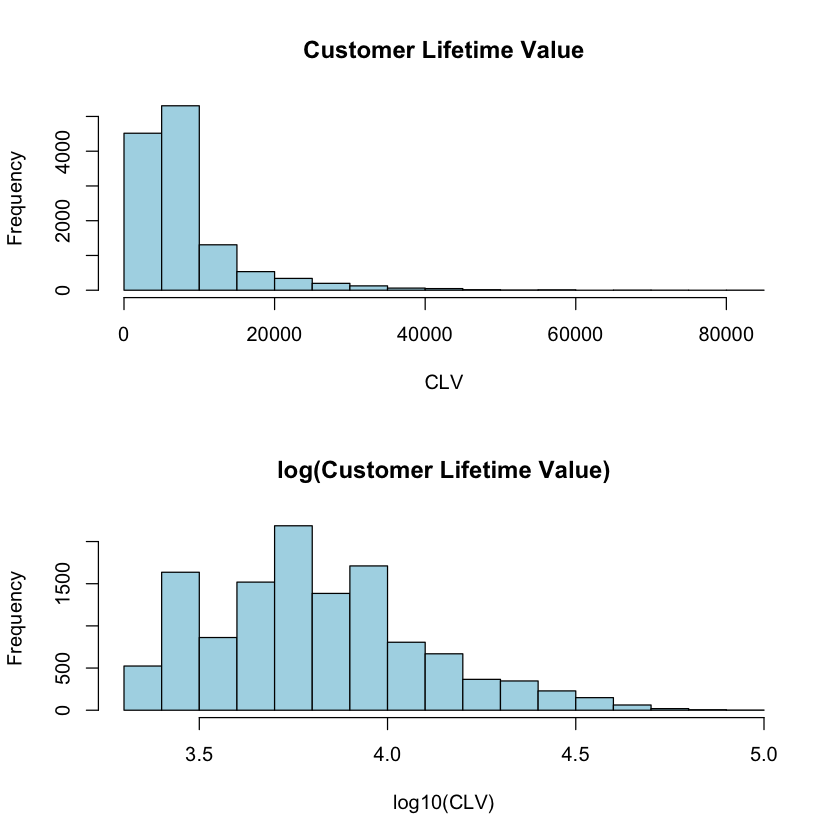

In [226]:
par(mfrow=c(2,1))
hist(data$CLV, col='lightblue', main='Customer Lifetime Value', xlab='CLV')
hist(log10(data$CLV), col='lightblue', main='log(Customer Lifetime Value)', xlab='log10(CLV)')
par(opar)

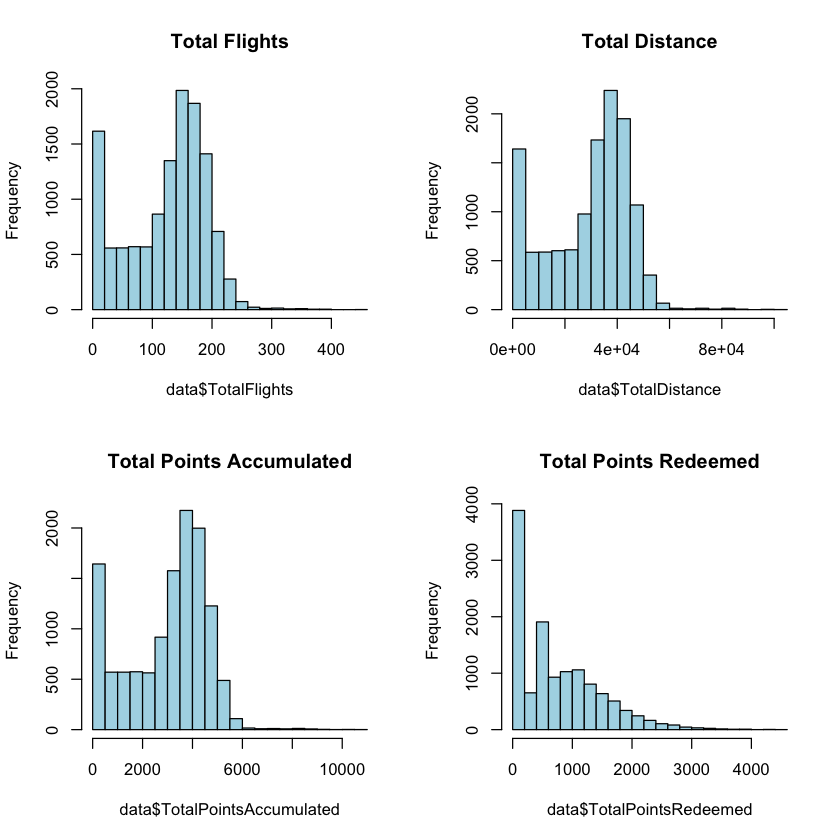

In [228]:
#pdf(file="../Figures/Flights.pdf")
par(mfrow=c(2,2))
hist(data$TotalFlights, col='lightblue', main='Total Flights', breaks=20)
hist(data$TotalDistance, col='lightblue', main='Total Distance', breaks=20)
hist(data$TotalPointsAccumulated, col='lightblue', main='Total Points Accumulated', breaks=20)
hist(data$TotalPointsRedeemed, col='lightblue', main='Total Points Redeemed', breaks=20)
par(opar)
#dev.off()

In [229]:
cor.test(data$TotalFlights, data$TotalDistance)
cor.test(data$TotalFlights, data$TotalPointsAccumulated)
cor.test(data$TotalDistance, data$TotalPointsAccumulated)
cor.test(data$TotalFlights, data$TotalPointsRedeemed)
cor.test(data$TotalPointsRedeemed, data$TotalDollarCostPointsRedeemed)


	Pearson's product-moment correlation

data:  data$TotalFlights and data$TotalDistance
t = 360.36, df = 12477, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9536004 0.9566774
sample estimates:
      cor 
0.9551647 



	Pearson's product-moment correlation

data:  data$TotalFlights and data$TotalPointsAccumulated
t = 353.94, df = 12477, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9520209 0.9552002
sample estimates:
      cor 
0.9536372 



	Pearson's product-moment correlation

data:  data$TotalDistance and data$TotalPointsAccumulated
t = 2284.1, df = 12477, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9987638 0.9988475
sample estimates:
      cor 
0.9988064 



	Pearson's product-moment correlation

data:  data$TotalFlights and data$TotalPointsRedeemed
t = 72.465, df = 12477, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5317781 0.5564773
sample estimates:
      cor 
0.5442456 



	Pearson's product-moment correlation

data:  data$TotalPointsRedeemed and data$TotalDollarCostPointsRedeemed
t = 17351, df = 12477, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9999785 0.9999800
sample estimates:
      cor 
0.9999793 


*We see that all the cumulative flights data, such as number of flights booked and total distance, is very strongly correlated with each other, as expected, but the redeemed points data contains different information. So later we might decide to only use "TotalFlights" and "TotalPointsRedeemed" as the independent variables from the flights data.*

### Box Plots

In [232]:
data$LoyaltyCard <- factor(data$LoyaltyCard, levels = c("Star", "Nova", "Aurora"))

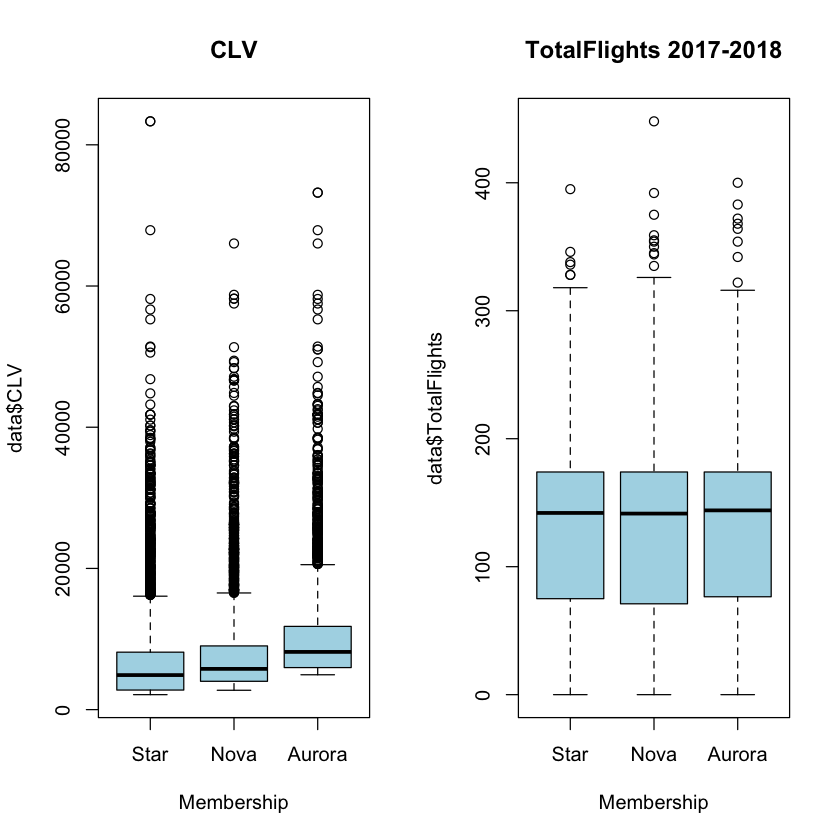

In [235]:
# Boxplot of CLV as a function of Loyalty Type
#pdf(file="../Figures/Boxplot_membership.pdf")
par(mfrow=c(1,2))
boxplot(data$CLV ~ data$LoyaltyCard, col='lightblue', main='CLV', xlab='Membership')
boxplot(data$TotalFlights ~ data$LoyaltyCard, col='lightblue', main='TotalFlights 2017-2018', xlab='Membership')
par(opar)
#dev.off()

In [236]:
levels(data$Education)

[1] "Bachelor"             "College"              "Doctor"              
[4] "High School or Below" "Master"

In [237]:
data$Education <- factor(data$Education, levels = c("High School or Below", "College", "Bachelor", "Master", "Doctor"))

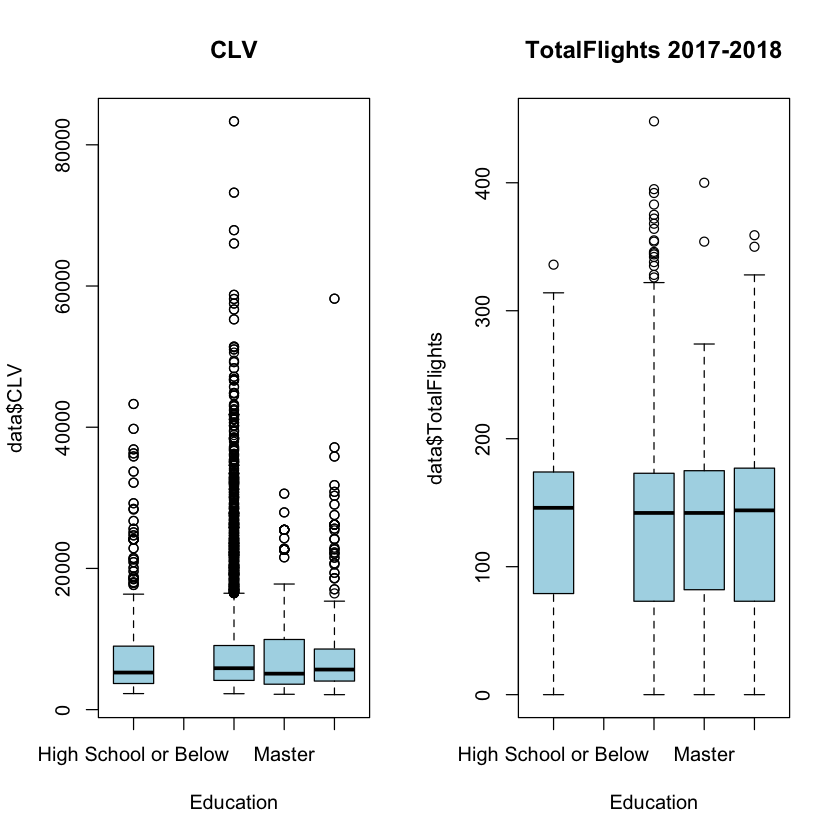

In [250]:
# Boxplot of CLV as a function of Education
#pdf(file="../Figures/Boxplot_education.pdf") #,width=13, height=8
par(mfrow=c(1,2))
boxplot(data$CLV ~ data$Education, col='lightblue', main='CLV', xlab='Education')
boxplot(data$TotalFlights ~ data$Education, col='lightblue', main='TotalFlights 2017-2018', xlab='Education' )
par(opar)
#dev.off()

In [245]:
levels(data$MaritalStatus)

[1] "Divorced" "Married"  "Single"

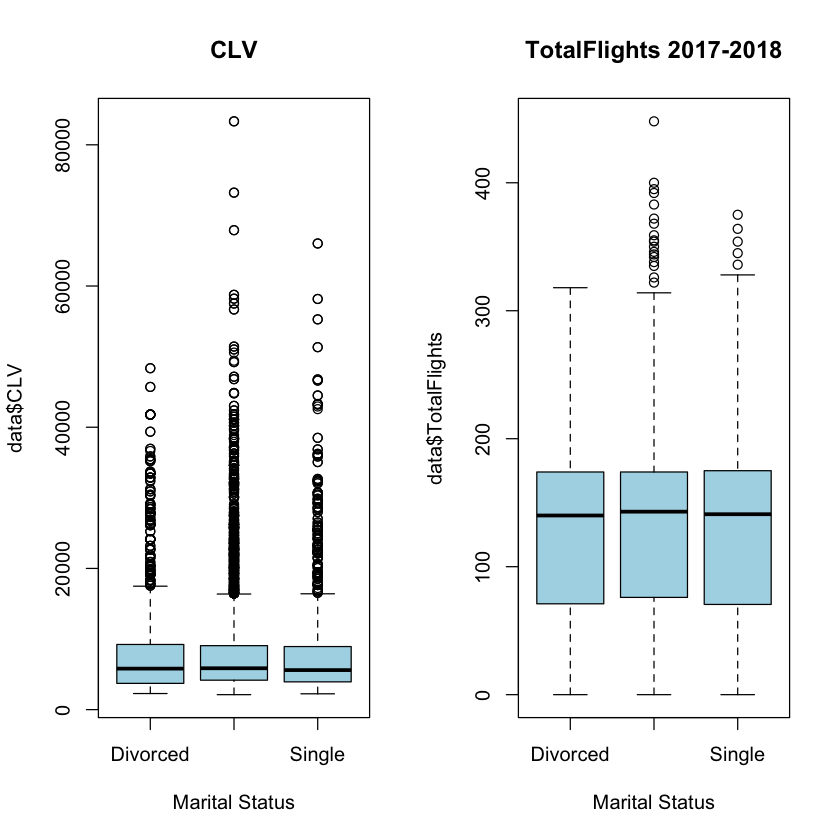

In [253]:
# Boxplot as a function of Marital Status
#pdf(file="../Figures/Boxplot_maritalstatus.pdf")
par(mfrow=c(1,2))
boxplot(data$CLV ~ data$MaritalStatus, col='lightblue', main='CLV', xlab='Marital Status')
boxplot(data$TotalFlights ~ data$MaritalStatus, col='lightblue', main='TotalFlights 2017-2018', xlab='Marital Status')
par(opar)
#dev.off()

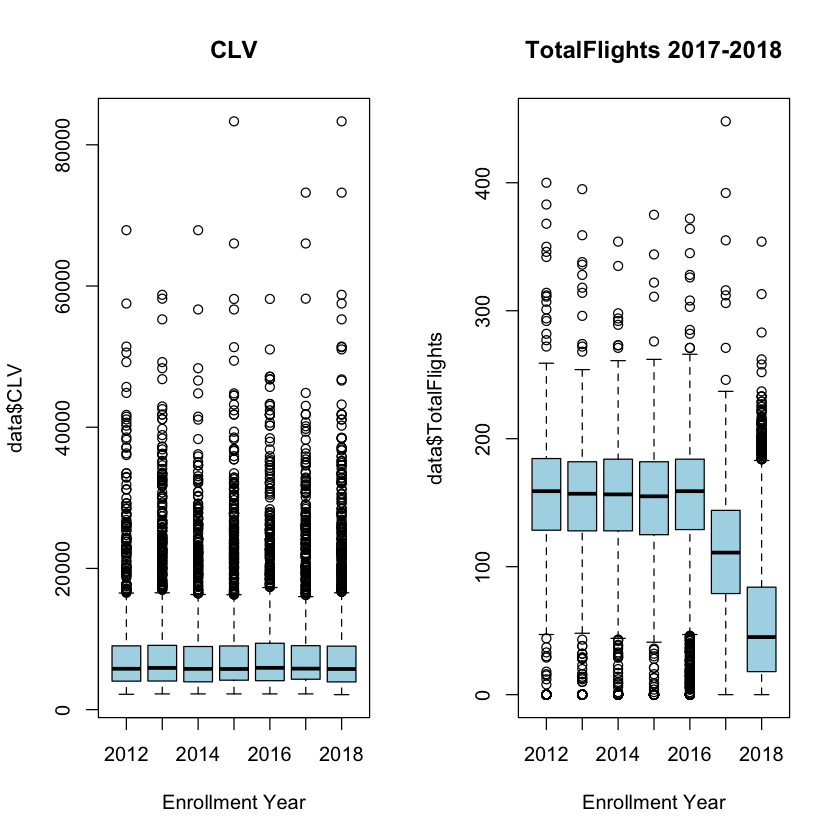

In [259]:
# Boxplots as a function of Enrollment Year
#pdf(file="../Figures/Boxplot_enrollmentyear.pdf")
par(mfrow=c(1,2))
boxplot(data$CLV ~ data$EnrollmentYear, col='lightblue', xlab='Enrollment Year', main='CLV')
boxplot(data$TotalFlights ~ data$EnrollmentYear, col='lightblue', xlab='Enrollment Year', main='TotalFlights 2017-2018')
par(opar)
#dev.off()

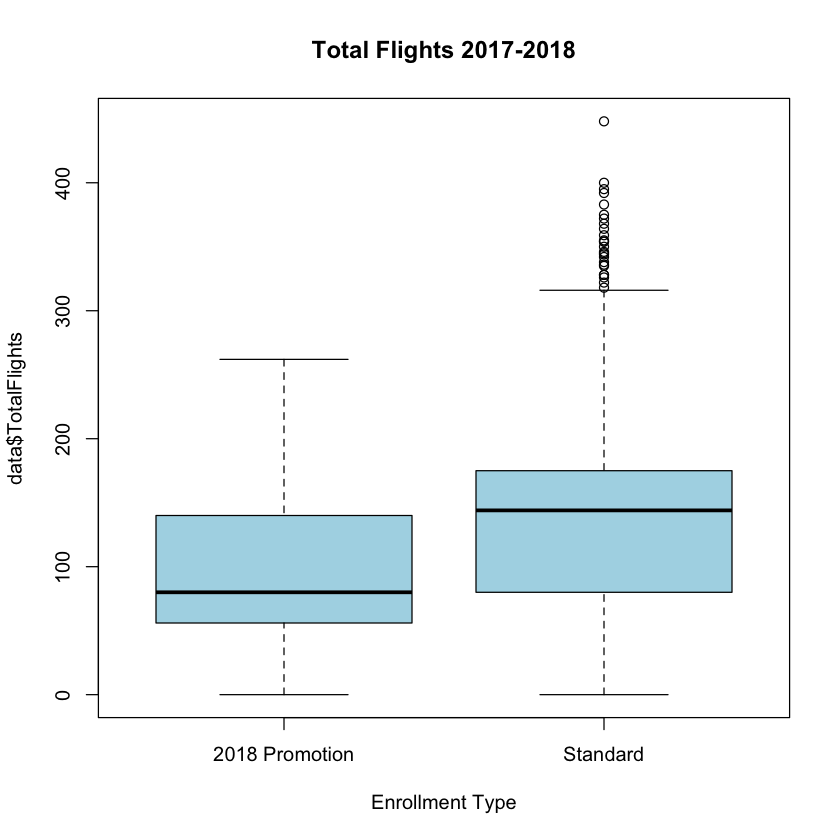

In [258]:
# Boxplot as a function of Enrollment Type
#pdf(file="../Figures/Boxplot_enrollmenttype.pdf")
boxplot(data$TotalFlights ~ data$EnrollmentType, col='lightblue', main='Total Flights 2017-2018', xlab='Enrollment Type')
#dev.off()

***Conclusions:** the total number of flights booked in 2017-2018 does not seem to depend strongly on membership type, marital status or education. It does depend on enrollment year: people who enrolled during the period 2017-2018 booked less flights in this period compared to people who were already enrolled. We also see this in the last boxplot: people who enrolled as part of the "2018 Promotion" booked less flights in 2017-2018 than people who were enrolled outside of the promotion. We also see that the Customer Lifetime Value (CLV) has a lot of outliers, but there seems to be some evidence that the CLV is higher for higher-level memberships (highest level is Aurora, followed by Nova, and then Star).*

## Fitting Total Number of Flights Booked (between 2017-2018)

*Let's continue and fit the Total Number of Flights Booked as a function of Customer Loyalty data using two different methods. First we will try a Linear Regression and then compare the RMSE with that of using a Random Forest.*

In [262]:
str(data)

'data.frame':	12479 obs. of  20 variables:
 $ Customer                     : int  100018 100214 100272 100301 100364 100380 100428 100504 100550 100585 ...
 $ Province                     : chr  "Alberta" "British Columbia" "Ontario" "Ontario" ...
 $ City                         : chr  "Edmonton" "Vancouver" "Toronto" "Toronto" ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 1 2 1 1 2 ...
 $ Education                    : Factor w/ 5 levels "High School or Below",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Salary                       : int  92552 63253 91163 70323 76849 69695 63478 75638 54133 96269 ...
 $ MaritalStatus                : Factor w/ 3 levels "Divorced","Married",..: 2 2 1 1 2 3 2 1 2 1 ...
 $ LoyaltyCard                  : Factor w/ 3 levels "Star","Nova",..: 3 1 1 2 2 1 3 2 2 1 ...
 $ CLV                          : num  7919 4171 6622 48357 5144 ...
 $ EnrollmentType               : Factor w/ 2 levels "2018 Promotion",..: 2 2 2 2 2 2 2 2 2 2 ...
 

In [263]:
target_var <- 'TotalFlights'
feature_list <- c('Province','City','Gender','Education','Salary','MaritalStatus','LoyaltyCard','CLV','EnrollmentType','EnrollmentYear',
                 'EnrollmentMonth','TotalPointsRedeemed', 'Canceled')
fmla <- as.formula(sprintf('%s ~ %s', target_var, paste(feature_list, collapse = ' + ')))
lm_flights_booked <- lm(data = data, formula = fmla)
summary(lm_flights_booked)


Call:
lm(formula = fmla, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-144.851  -29.481   -3.225   25.387  298.223 

Coefficients: (10 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   1.799e+02  5.164e+00  34.830  < 2e-16 ***
ProvinceBritish Columbia      7.616e-01  4.214e+00   0.181  0.85658    
ProvinceManitoba             -1.671e-02  4.139e+00  -0.004  0.99678    
ProvinceNew Brunswick        -4.621e-01  4.941e+00  -0.094  0.92549    
ProvinceNewfoundland         -4.726e+00  4.800e+00  -0.985  0.32481    
ProvinceNova Scotia          -1.757e+00  4.231e+00  -0.415  0.67790    
ProvinceOntario              -1.170e-01  4.307e+00  -0.027  0.97833    
ProvincePrince Edward Island  5.056e-01  7.214e+00   0.070  0.94413    
ProvinceQuebec                4.828e-01  4.402e+00   0.110  0.91267    
ProvinceSaskatchewan          1.411e+00  4.409e+00   0.320  0.74893    
Province

*Let's reduce the model using "StepAIC".*

In [264]:
library(MASS)
stepAIC(lm_flights_booked)

Start:  AIC=93666.82
TotalFlights ~ Province + City + Gender + Education + Salary + 
    MaritalStatus + LoyaltyCard + CLV + EnrollmentType + EnrollmentYear + 
    EnrollmentMonth + TotalPointsRedeemed + Canceled


Step:  AIC=93666.82
TotalFlights ~ City + Gender + Education + Salary + MaritalStatus + 
    LoyaltyCard + CLV + EnrollmentType + EnrollmentYear + EnrollmentMonth + 
    TotalPointsRedeemed + Canceled

                      Df Sum of Sq      RSS   AIC
- City                28     40279 22523999 93633
- MaritalStatus        2      2477 22486197 93664
- LoyaltyCard          2      3248 22486968 93665
- Education            3      7481 22491201 93665
- CLV                  1      1053 22484773 93665
- Salary               1      1338 22485057 93666
<none>                             22483720 93667
- Gender               1      7169 22490888 93669
- EnrollmentMonth     11    301275 22784994 93811
- EnrollmentType       1    954519 23438239 94184
- TotalPointsRedeemed  1   397494


Call:
lm(formula = TotalFlights ~ Gender + EnrollmentType + EnrollmentYear + 
    EnrollmentMonth + TotalPointsRedeemed + Canceled, data = data)

Coefficients:
           (Intercept)              GenderMale  EnrollmentTypeStandard  
             180.68988                 1.48207               -50.38179  
    EnrollmentYear2013      EnrollmentYear2014      EnrollmentYear2015  
              13.29143                13.68733                12.70490  
    EnrollmentYear2016      EnrollmentYear2017      EnrollmentYear2018  
              16.21431               -13.41645               -81.60427  
      EnrollmentMonth2        EnrollmentMonth3        EnrollmentMonth4  
              -4.66087                -6.65688               -11.28438  
      EnrollmentMonth5        EnrollmentMonth6        EnrollmentMonth7  
              -4.97092                -2.06674               -10.13520  
      EnrollmentMonth8        EnrollmentMonth9       EnrollmentMonth10  
             -12.63183              

In [265]:
target_var <- 'TotalFlights'
feature_list <- c('Gender','EnrollmentType','EnrollmentYear',
                 'EnrollmentMonth','TotalPointsRedeemed','Canceled')
fmla <- as.formula(sprintf('%s ~ %s', target_var, paste(feature_list, collapse = ' + ')))
lm_flights_booked <- lm(data = data, formula = fmla)
summary(lm_flights_booked)


Call:
lm(formula = fmla, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.082  -29.490   -3.267   25.189  297.357 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.807e+02  3.032e+00  59.587  < 2e-16 ***
GenderMale              1.482e+00  7.621e-01   1.945 0.051823 .  
EnrollmentTypeStandard -5.038e+01  2.198e+00 -22.924  < 2e-16 ***
EnrollmentYear2013      1.329e+01  1.591e+00   8.352  < 2e-16 ***
EnrollmentYear2014      1.369e+01  1.601e+00   8.550  < 2e-16 ***
EnrollmentYear2015      1.270e+01  1.601e+00   7.935 2.29e-15 ***
EnrollmentYear2016      1.621e+01  1.588e+00  10.211  < 2e-16 ***
EnrollmentYear2017     -1.342e+01  1.583e+00  -8.474  < 2e-16 ***
EnrollmentYear2018     -8.160e+01  1.654e+00 -49.332  < 2e-16 ***
EnrollmentMonth2       -4.661e+00  2.084e+00  -2.236 0.025370 *  
EnrollmentMonth3       -6.657e+00  2.022e+00  -3.292 0.000996 ***
EnrollmentMonth4       -1.128e+01  2.001e+00  -5.6

*Our reduced linear model is significant and explains about 61% of the observed variance (R-squared = 0.6086).*

*Let's now first test if "Customer Lifetime Value" (CLV) is easier to model, before we pick one of the two and look into more detail into the accuracy and ROC of the fit.*

## Fitting a Linear Model to predict CLV

In [266]:
lm_CLV <- lm(CLV ~ . -TotalFlights -TotalSoloFlights -TotalCompanionFlights -TotalDistance -TotalPointsAccumulated 
            -TotalDollarCostPointsRedeemed, data = data)
summary(lm_CLV)


Call:
lm(formula = CLV ~ . - TotalFlights - TotalSoloFlights - TotalCompanionFlights - 
    TotalDistance - TotalPointsAccumulated - TotalDollarCostPointsRedeemed, 
    data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -7088  -3998  -2112   1133  75728 

Coefficients: (10 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   7.048e+03  8.325e+02   8.466  < 2e-16 ***
Customer                     -2.150e-04  2.344e-04  -0.917  0.35903    
ProvinceBritish Columbia      1.330e+03  6.729e+02   1.976  0.04816 *  
ProvinceManitoba              7.304e+02  6.611e+02   1.105  0.26926    
ProvinceNew Brunswick         1.569e+02  7.892e+02   0.199  0.84241    
ProvinceNewfoundland          4.675e+02  7.667e+02   0.610  0.54206    
ProvinceNova Scotia           2.963e+02  6.758e+02   0.439  0.66102    
ProvinceOntario               1.542e+02  6.880e+02   0.224  0.82267    
ProvincePrince Edward Island

In [267]:
stepAIC(lm_CLV)

Start:  AIC=220288.9
CLV ~ (Customer + Province + City + Gender + Education + Salary + 
    MaritalStatus + LoyaltyCard + EnrollmentType + EnrollmentYear + 
    EnrollmentMonth + TotalSoloFlights + TotalCompanionFlights + 
    TotalFlights + TotalDistance + TotalPointsAccumulated + TotalPointsRedeemed + 
    TotalDollarCostPointsRedeemed + Canceled) - TotalFlights - 
    TotalSoloFlights - TotalCompanionFlights - TotalDistance - 
    TotalPointsAccumulated - TotalDollarCostPointsRedeemed


Step:  AIC=220288.9
CLV ~ Customer + City + Gender + Education + Salary + MaritalStatus + 
    LoyaltyCard + EnrollmentType + EnrollmentYear + EnrollmentMonth + 
    TotalPointsRedeemed + Canceled

                      Df  Sum of Sq        RSS    AIC
- City                28 1.5339e+09 5.7509e+11 220266
- EnrollmentMonth     11 3.7041e+08 5.7392e+11 220275
- EnrollmentYear       6 1.9235e+08 5.7375e+11 220281
- EnrollmentType       1 7.3533e+05 5.7355e+11 220287
- Gender               1 8.1322e+05 5


Call:
lm(formula = CLV ~ Salary + LoyaltyCard, data = data)

Coefficients:
      (Intercept)             Salary    LoyaltyCardNova  LoyaltyCardAurora  
        7.219e+03         -3.758e-03          1.151e+03          3.794e+03  


In [268]:
lm_CLV <- lm(CLV ~ Salary + LoyaltyCard, data = data)
summary(lm_CLV)


Call:
lm(formula = CLV ~ Salary + LoyaltyCard, data = data)

Residuals:
   Min     1Q Median     3Q    Max 
 -5884  -4169  -2178   1083  76389 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        7.219e+03  1.674e+02  43.136   <2e-16 ***
Salary            -3.758e-03  1.752e-03  -2.145    0.032 *  
LoyaltyCardNova    1.151e+03  1.380e+02   8.339   <2e-16 ***
LoyaltyCardAurora  3.794e+03  1.610e+02  23.566   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6795 on 12475 degrees of freedom
Multiple R-squared:  0.04307,	Adjusted R-squared:  0.04284 
F-statistic: 187.1 on 3 and 12475 DF,  p-value: < 2.2e-16


***Conclusion:** CLV is harder to predict than TotalFlights (much lower R-squared and F-statistic that show that CLV shows much more variance that can't be explained by the model).*

*Let's pick the best model (TotalFlights) and make some predictions on a testing dataset.*

## Training and Testing Split

In [269]:
# Use the "caret" library to split the data into training and testing sets
#install.packages("caret")
library(caret)
# Use an arbitrary column to sample random indices along
trainIdx <- createDataPartition(data$TotalFlights, p=0.7, list=FALSE, times = 1)
# Create the split
data_train <- data[trainIdx, ]
data_test <- data[-trainIdx, ]

In [270]:
# Fit TotalFlights only on the Training Data
lm_flights_booked <- lm(TotalFlights ~ Gender + EnrollmentType + EnrollmentYear + EnrollmentMonth + 
                        TotalPointsRedeemed + Canceled, 
                        data = data_train)
summary(lm_flights_booked)


Call:
lm(formula = TotalFlights ~ Gender + EnrollmentType + EnrollmentYear + 
    EnrollmentMonth + TotalPointsRedeemed + Canceled, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-145.220  -29.378   -3.447   25.383  264.423 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.806e+02  3.590e+00  50.298  < 2e-16 ***
GenderMale              1.824e+00  9.074e-01   2.010 0.044427 *  
EnrollmentTypeStandard -4.915e+01  2.614e+00 -18.805  < 2e-16 ***
EnrollmentYear2013      1.198e+01  1.881e+00   6.367 2.03e-10 ***
EnrollmentYear2014      1.293e+01  1.899e+00   6.807 1.06e-11 ***
EnrollmentYear2015      1.258e+01  1.896e+00   6.633 3.48e-11 ***
EnrollmentYear2016      1.597e+01  1.889e+00   8.451  < 2e-16 ***
EnrollmentYear2017     -1.517e+01  1.887e+00  -8.042 9.98e-16 ***
EnrollmentYear2018     -8.309e+01  1.969e+00 -42.201  < 2e-16 ***
EnrollmentMonth2       -5.826e+00  2.485e+00  -2.344 0.019101 *  
Enr

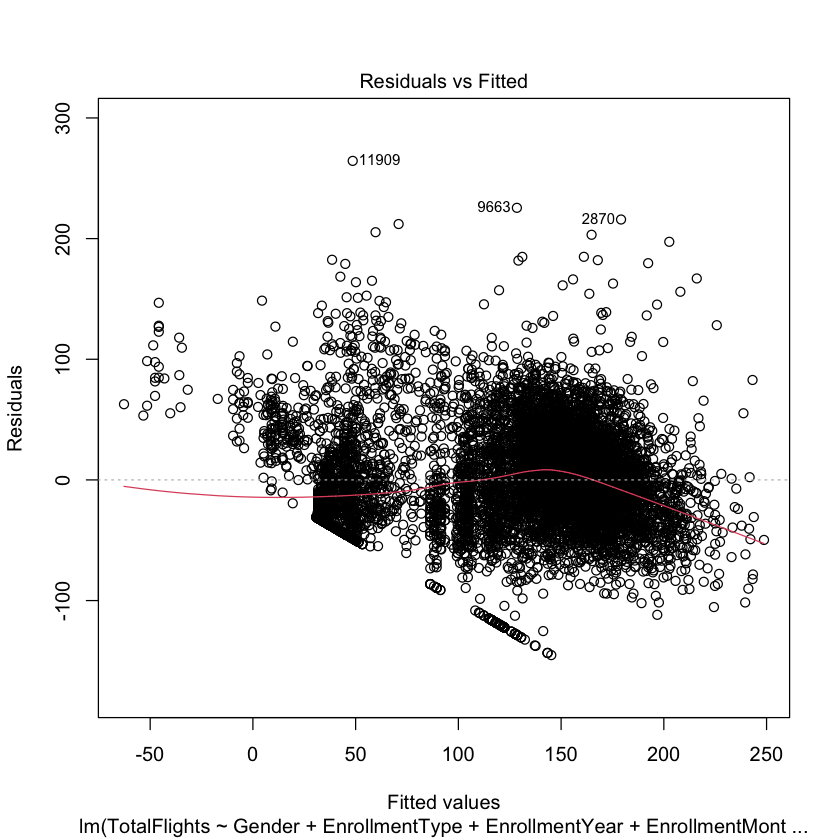

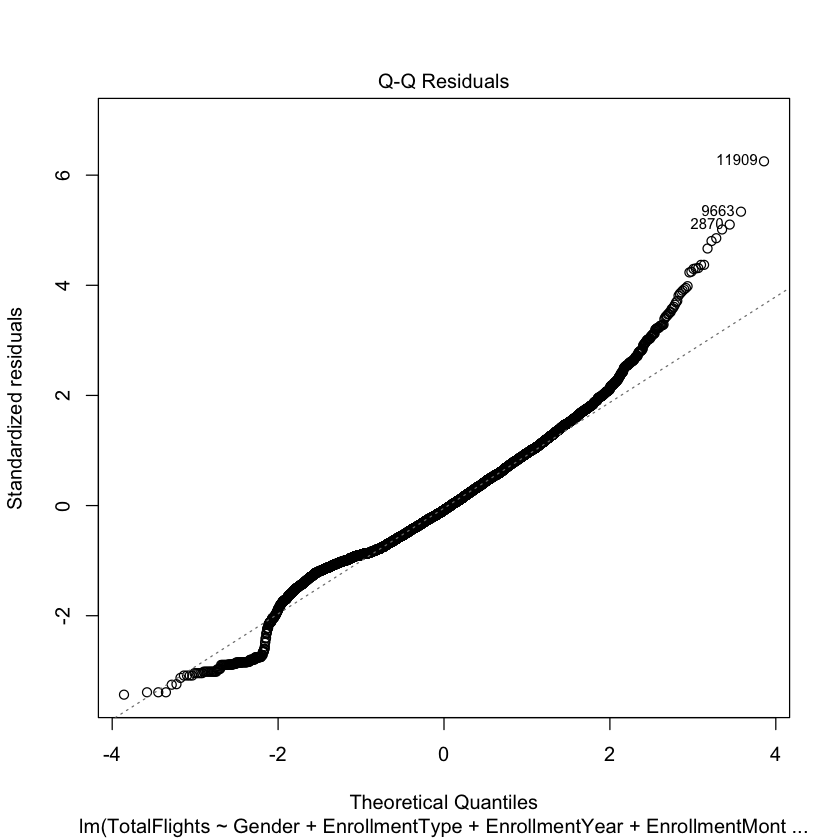

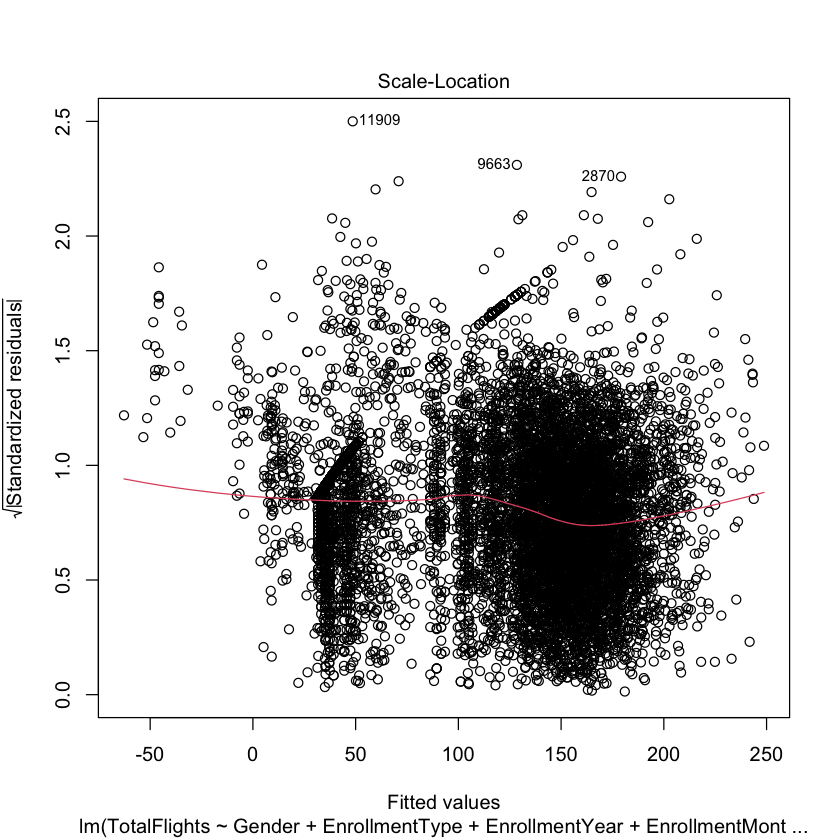

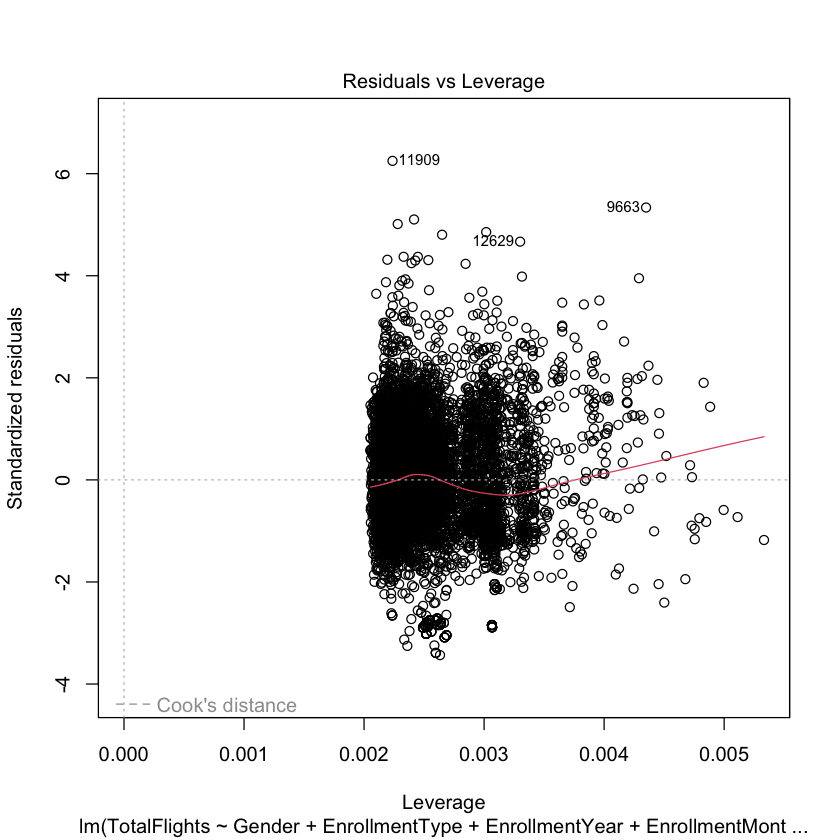

In [277]:
plot(lm_flights_booked)

In [275]:
# Predict TotalFlights on the Testing Data using a Linear Regression
pred_flights_booked_lm = predict(lm_flights_booked, data_test)

# Calculate RMSE (Root-Meas-Squared-Error) of the Predictions on the Testing Data
pred_flights_booked_RMSE_lm <- sqrt( mean( (pred_flights_booked_lm - data_test$TotalFlights)^2 ))
pred_flights_booked_RMSE_lm

[1] 43.00774

*Our Linear Regression Model of Total Flights Booked has a RMSE on the Testing Data of 42.69.*

*Let's now test how well a Random Forest does.*

### Fitting Total Number of Flights Booked using a Random Forest

In [273]:
# Predict TotalFlights on the Testing Data using a RandomForest
# install.packages('randomForest')
library(randomForest)
rf_flights_booked <- randomForest(TotalFlights ~ . -TotalSoloFlights -TotalCompanionFlights -TotalDistance -TotalPointsAccumulated 
                                  -TotalDollarCostPointsRedeemed, data = data_train)
summary(rf_flights_booked)

                Length Class  Mode     
call               3   -none- call     
type               1   -none- character
predicted       8737   -none- numeric  
mse              500   -none- numeric  
rsq              500   -none- numeric  
oob.times       8737   -none- numeric  
importance        14   -none- numeric  
importanceSD       0   -none- NULL     
localImportance    0   -none- NULL     
proximity          0   -none- NULL     
ntree              1   -none- numeric  
mtry               1   -none- numeric  
forest            11   -none- list     
coefs              0   -none- NULL     
y               8737   -none- numeric  
test               0   -none- NULL     
inbag              0   -none- NULL     
terms              3   terms  call     

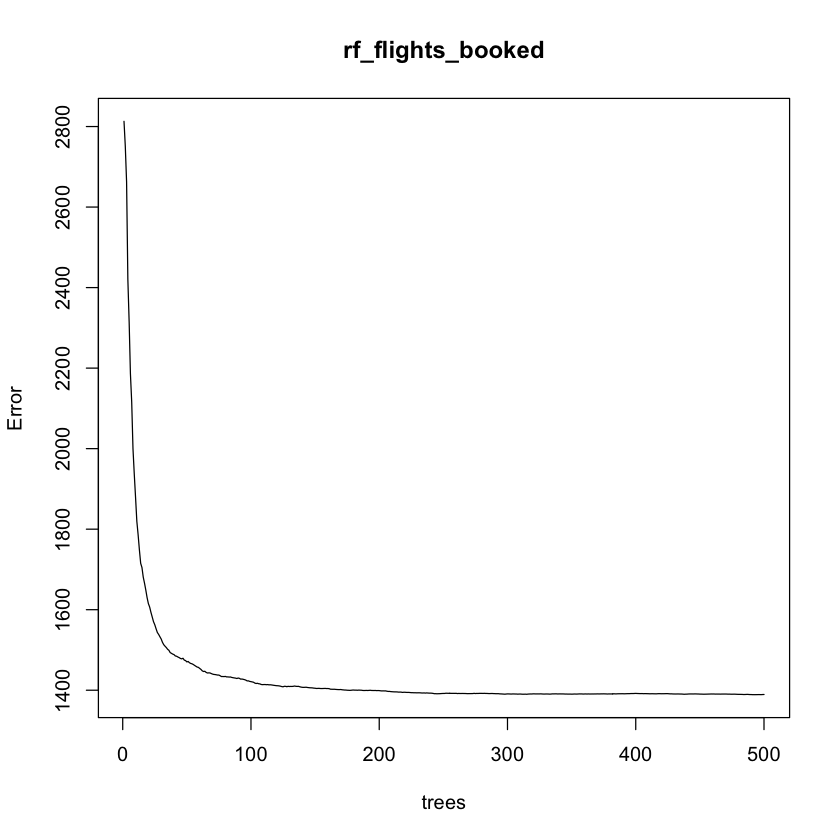

In [278]:
plot(rf_flights_booked)

In [276]:
# Predict TotalFlights on the Testing Data using a Random Forest
pred_flights_booked_rf = predict(rf_flights_booked, data_test)

# Calculate RMSE (Root-Meas-Squared-Error) of the Predictions on the Testing Data
pred_flights_booked_RMSE_rf <- sqrt( mean( (pred_flights_booked_rf - data_test$TotalFlights)^2 ))
pred_flights_booked_RMSE_rf

[1] 38.08702

***Conclusion:** RandomForest (RMSE = 37.50) performs better than the Linear Regression (RMSE = 42.69).*

# Predicting if a customer will cancel in 2018

*Next, let's see if we can predict if a customer will cancel their membership in 2018, based on Loyalty data and Flight Booking data from before 2018.*

*For this analysis, we need to prepare the data in a different way than what we did above:*

- *First I will remove all data from customers who canceled before 2018.*
- *Then I will remove all flight booking data from 2018.*
- *Using loyalty data starting from 2012, and flight booking data from only 2017, I will predict if the customer will cancel their membership in 2018.*

## Data Preparation

*First we repeat most of the data preparation from above, but now we specifically want to know if they canceled in 2018, based on data from **before** 2018.*

In [1]:
# Start fresh by reading the original data
flights <- read.csv('../Data/CustomerFlightActivity.csv', header=TRUE)
loyalty <- read.csv('../Data/CustomerLoyaltyHistory.csv', header=TRUE)

# Remove the "." from all column names
colnames(flights) <- c("LoyaltyNumber", "Year", "Month", "FlightsBooked","FlightsWithCompanions","TotalFlights","Distance","PointsAccumulated","PointsRedeemed","DollarCostPointsRedeemed")
colnames(loyalty) <- c("LoyaltyNumber","Country","Province","City","PostalCode","Gender","Education","Salary","MaritalStatus","LoyaltyCard","CLV","EnrollmentType","EnrollmentYear","EnrollmentMonth","CancellationYear","CancellationMonth")

In [2]:
# Remove 2018 Flights Data
flights <- flights[which(flights$Year == 2017) , ]

# Remove Loyalty Data from people who canceled before 2018
# First set all NAs to "9999"
loyalty$CancellationYear[which(is.na(loyalty$CancellationYear))] = 9999
# Then only keep data for which CancellationYear is 2018 or higher
loyalty <- loyalty[which(loyalty$CancellationYear > 2017), ]

In [3]:
# Join the data with SQL
library(sqldf)
data_tmp <- sqldf('
SELECT 
  loyalty.LoyaltyNumber as Customer,
  loyalty.Province as Province,
  loyalty.City as City,
  loyalty.Gender as Gender,
  loyalty.Education as Education,
  loyalty.Salary as Salary,
  loyalty.MaritalStatus as MaritalStatus,
  loyalty.LoyaltyCard as LoyaltyCard,
  loyalty.CLV as CLV,
  loyalty.EnrollmentType as EnrollmentType,
  loyalty.EnrollmentYear as EnrollmentYear,
  loyalty.EnrollmentMonth as EnrollmentMonth,
  loyalty.CancellationYear as CancellationYear,
  loyalty.CancellationMonth as CancellationMonth,
  SUM(flights.FlightsBooked) as TotalSoloFlights,
  SUM(flights.FlightsWithCompanions) as TotalCompanionFlights,
  SUM(flights.TotalFlights) as TotalFlights,
  SUM(flights.Distance) as TotalDistance,
  SUM(flights.PointsAccumulated) as TotalPointsAccumulated,
  SUM(flights.PointsRedeemed) as TotalPointsRedeemed,
  SUM(flights.DollarCostPointsRedeemed) as TotalDollarCostPointsRedeemed
FROM 
  flights
INNER JOIN 
  loyalty
ON 
  loyalty.LoyaltyNumber = flights.LoyaltyNumber
GROUP BY
  Customer
;')

Loading required package: gsubfn

Loading required package: proto

Loading required package: RSQLite



In [4]:
# Add a "Canceled2018" column 
data_tmp$Canceled2018 = as.integer(data_tmp$CancellationYear == 2018)
# Now we can remove the CancellationYear and CancellationMonth columns (columns 13, 14)
data <- data_tmp[,-c(13,14)]

In [5]:
# Remove remaining NAs (only Salary had some NAs)
data <- na.omit(data)
# Remove negative Salary 
data <- data[which(data$Salary > 0), ]

In [6]:
# Converting most categorical data to factors
data$Gender <- as.factor(data$Gender)
data$Education <- as.factor(data$Education)
data$MaritalStatus <- as.factor(data$MaritalStatus)
data$LoyaltyCard <- as.factor(data$LoyaltyCard)
data$EnrollmentType <- as.factor(data$EnrollmentType)
data$EnrollmentYear <- as.factor(data$EnrollmentYear)
data$EnrollmentMonth <- as.factor(data$EnrollmentMonth)

In [7]:
prop.table(table(data$Canceled2018))


         0          1 
0.95872766 0.04127234 

*We see that we have imbalanced data (only 4% of customers canceled in 2018). Tree-based models are best suited for handling this, and are also a good choice for data containing a lot of categorical features, like we have in our loyalty data. So we will continue by making a Training and Testing split and then use XGBoost to predict "Canceled2018".*

In [8]:
str(data)

'data.frame':	11412 obs. of  20 variables:
 $ Customer                     : int  100018 100214 100272 100301 100364 100380 100428 100504 100550 100585 ...
 $ Province                     : chr  "Alberta" "British Columbia" "Ontario" "Ontario" ...
 $ City                         : chr  "Edmonton" "Vancouver" "Toronto" "Toronto" ...
 $ Gender                       : Factor w/ 2 levels "Female","Male": 1 2 1 2 2 1 2 1 1 2 ...
 $ Education                    : Factor w/ 4 levels "Bachelor","Doctor",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Salary                       : int  92552 63253 91163 70323 76849 69695 63478 75638 54133 96269 ...
 $ MaritalStatus                : Factor w/ 3 levels "Divorced","Married",..: 2 2 1 1 2 3 2 1 2 1 ...
 $ LoyaltyCard                  : Factor w/ 3 levels "Aurora","Nova",..: 1 3 3 2 2 3 1 2 2 3 ...
 $ CLV                          : num  7919 4171 6622 48357 5144 ...
 $ EnrollmentType               : Factor w/ 2 levels "2018 Promotion",..: 2 2 2 2 2 2 2 2 2 2 ...
 $

## Training and Testing Split

In [9]:
library('Matrix')
data_mat = sparse.model.matrix(Canceled2018 ~ . -Canceled2018, data=data )

In [10]:
# Features need to be in matrix form
x = data_mat
# Dependent variable that we try to predict is Canceled2018
y = as.matrix( data[ , c("Canceled2018")] )

In [11]:
sum(y)
length(y)

[1] 471

[1] 11412

In [12]:
library(caret)
training_Inds = createDataPartition( data$Canceled2018 , p=0.7 , list=FALSE , times=1 )
testing_Inds = seq( 1 , length(data$Canceled2018) )[ -training_Inds ]
training_Inds = as.vector(training_Inds)
testing_Inds = as.vector(testing_Inds)
print( paste('Training Inds len=',length(training_Inds),
             'Testing Inds len=',length(testing_Inds)) )

Loading required package: ggplot2

Loading required package: lattice



[1] "Training Inds len= 7989 Testing Inds len= 3423"


In [13]:
xtrain = x[ training_Inds , ]
ytrain = y[ training_Inds ]
xtest = x[ testing_Inds , ]
ytest = y[ testing_Inds ]

In [14]:
sum(ytest)
length(ytest)

[1] 148

[1] 3423

In [15]:
ratioNoCancel <- sum( data$Canceled2018 == F ) / sum( data$Canceled2018 == T )
ratioNoCancel

[1] 23.2293

*We see above that we have about 3400 customers in our Testing Data, of which only about 128 customers canceled in 2018, which means that for every cancellation, 23 members did **not** cancel. We will take this so-called **class-imbalance** into account in XGBoost with the parameter "scale_pos_weight".*

## XGBoost model to predict "Canceled2018"

*Since we have mostly categorical data, it makes sense to use a tree-based model such as XGBoost.*

In [16]:
library(xgboost)

In [17]:
param = list(objective = "binary:logistic", 
             eval_metric = "error",             # "error", error is the ratio of (wrong classes/all classes)
             scale_pos_weight = ratioNoCancel,
             max_depth = 7,
             eta = 0.025, 
             colsample_bytree = 0.5, 
             min_child_weight = 1)
nrounds = 200
xgb_canceled = xgboost(params = param, 
              data = xtrain, 
              label = ytrain, 
              nrounds = nrounds,
              verbose = 1,
              verbosity = 1)

[1]	train-error:0.231443 
[2]	train-error:0.210539 
[3]	train-error:0.185130 
[4]	train-error:0.167480 
[5]	train-error:0.163600 
[6]	train-error:0.161222 
[7]	train-error:0.158343 
[8]	train-error:0.159720 
[9]	train-error:0.149080 
[10]	train-error:0.145700 
[11]	train-error:0.143823 
[12]	train-error:0.140693 
[13]	train-error:0.137940 
[14]	train-error:0.135687 
[15]	train-error:0.135937 
[16]	train-error:0.135812 
[17]	train-error:0.134936 
[18]	train-error:0.134560 
[19]	train-error:0.133684 
[20]	train-error:0.132432 
[21]	train-error:0.133308 
[22]	train-error:0.131681 
[23]	train-error:0.132182 
[24]	train-error:0.131806 
[25]	train-error:0.133058 
[26]	train-error:0.132432 
[27]	train-error:0.130805 
[28]	train-error:0.129678 
[29]	train-error:0.129553 
[30]	train-error:0.128677 
[31]	train-error:0.128927 
[32]	train-error:0.129553 
[33]	train-error:0.128677 
[34]	train-error:0.128176 
[35]	train-error:0.127425 
[36]	train-error:0.127926 
[37]	train-error:0.128301 
[38]	train

In [18]:
xgb_canceled

##### xgb.Booster
raw: 631.4 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, verbosity = 1)
params (as set within xgb.train):
  objective = "binary:logistic", eval_metric = "error", scale_pos_weight = "23.2292993630573", max_depth = "7", eta = "0.025", colsample_bytree = "0.5", min_child_weight = "1", verbosity = "1", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 75 
niter: 200
nfeatures : 75 
evaluation_log:
    iter train_error
       1  0.23144323
       2  0.21053949
---                 
     199  0.09325322
     200  0.09250219

In [19]:
pred_cancel <- predict(xgb_canceled, xtest)

In [20]:
min(pred_cancel)
max(pred_cancel)

[1] 0.01261706

[1] 0.8470721

In [21]:
pred_cancel = ifelse( pred_cancel > 0.5 , 1 , 0 )

In [22]:
sum(pred_cancel == 1) / length(pred_cancel)

[1] 0.1224072

*With a threshold value of 0.5, our model predicts that about 11% of the customers will cancel in 2018, which is a bit high, as we saw above that it is closer to 4%. We might improve our model performance by tweaking this threshold value, which we will do below, but first let's look at the confusion matrix, accuracy, and ROC of the current model:*

In [23]:
cmatrix_xgb <- confusionMatrix(table(pred_cancel, ytest))
cmatrix_xgb

Confusion Matrix and Statistics

           ytest
pred_cancel    0    1
          0 2915   89
          1  360   59
                                        
               Accuracy : 0.8688        
                 95% CI : (0.8571, 0.88)
    No Information Rate : 0.9568        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.1541        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.8901        
            Specificity : 0.3986        
         Pos Pred Value : 0.9704        
         Neg Pred Value : 0.1408        
             Prevalence : 0.9568        
         Detection Rate : 0.8516        
   Detection Prevalence : 0.8776        
      Balanced Accuracy : 0.6444        
                                        
       'Positive' Class : 0             
                                        

***Conclusion:** this shows our model performs poorly in predicting if a customer cancels in 2018. For some reason the specificity and sensitivity seem flipped compared to what I expect, but nevertheless these results show that only about 35-37% of the cancelations are predicted correctly, and 90% of the non-cancelations. The 88% accuracy seems high because of the large class-imbalance: the majority of people don't cancel, and our model also predicts that, but note that the naive model of just predicting that no one will cancel would have an accuracy of about 96% (since only 4% of all people canceled).*

*Let's now also look at the ROC and AUC:*

In [24]:
library(pROC)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




In [25]:
attributes(cmatrix_xgb)
xgb_acc <- cmatrix_xgb$overall[[1]]

$names
[1] "positive" "table"    "overall"  "byClass"  "mode"     "dots"    

$class
[1] "confusionMatrix"

In [32]:
roc_score = roc(ytest, pred_cancel)
roc_score

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = ytest, predictor = pred_cancel)

Data: pred_cancel in 3275 controls (ytest 0) < 148 cases (ytest 1).
Area under the curve: 0.6444

In [28]:
xgb_auc <- auc(roc_score)

In [29]:
mytitle <- paste("Canceled2018 Accuracy: ", format(xgb_acc, digits=4), " AUC: ", format(xgb_auc, digits=4))

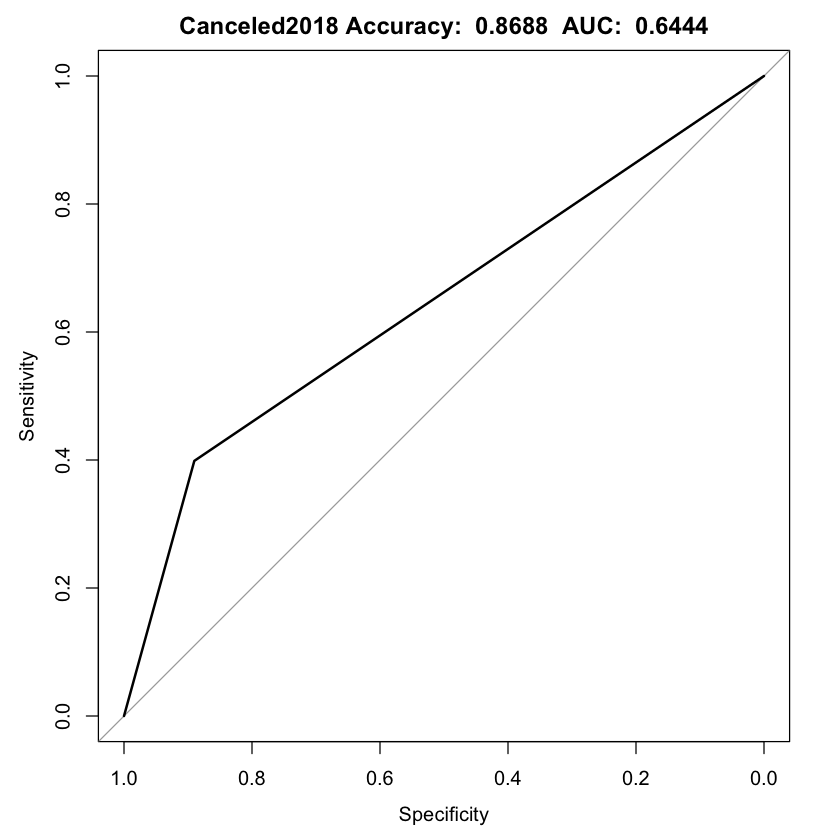

In [30]:
#pdf(file="../Figures/ROC.pdf")
plot( roc_score , main = mytitle)
#dev.off()

*Let's now try to improve this by tweaking the threshold value:*

In [353]:
pred_cancel2 <- predict(xgb_canceled, xtest)
pred_cancel2 = ifelse( pred_cancel2 > 0.7 , 1 , 0 )
sum(pred_cancel2 == 1) / length(pred_cancel2)
cmatrix_xgb2 <- confusionMatrix(table(pred_cancel2, ytest))
cmatrix_xgb2

[1] 0.03564125

Confusion Matrix and Statistics

            ytest
pred_cancel2    0    1
           0 3199  102
           1  105   17
                                         
               Accuracy : 0.9395         
                 95% CI : (0.931, 0.9473)
    No Information Rate : 0.9652         
    P-Value [Acc > NIR] : 1.0000         
                                         
                  Kappa : 0.1097         
                                         
 Mcnemar's Test P-Value : 0.8894         
                                         
            Sensitivity : 0.9682         
            Specificity : 0.1429         
         Pos Pred Value : 0.9691         
         Neg Pred Value : 0.1393         
             Prevalence : 0.9652         
         Detection Rate : 0.9346         
   Detection Prevalence : 0.9644         
      Balanced Accuracy : 0.5555         
                                         
       'Positive' Class : 0              
                                        

Setting levels: control = 0, case = 1

Setting direction: controls < cases




Call:
roc.default(response = ytest, predictor = pred_cancel2)

Data: pred_cancel2 in 3304 controls (ytest 0) < 119 cases (ytest 1).
Area under the curve: 0.5555

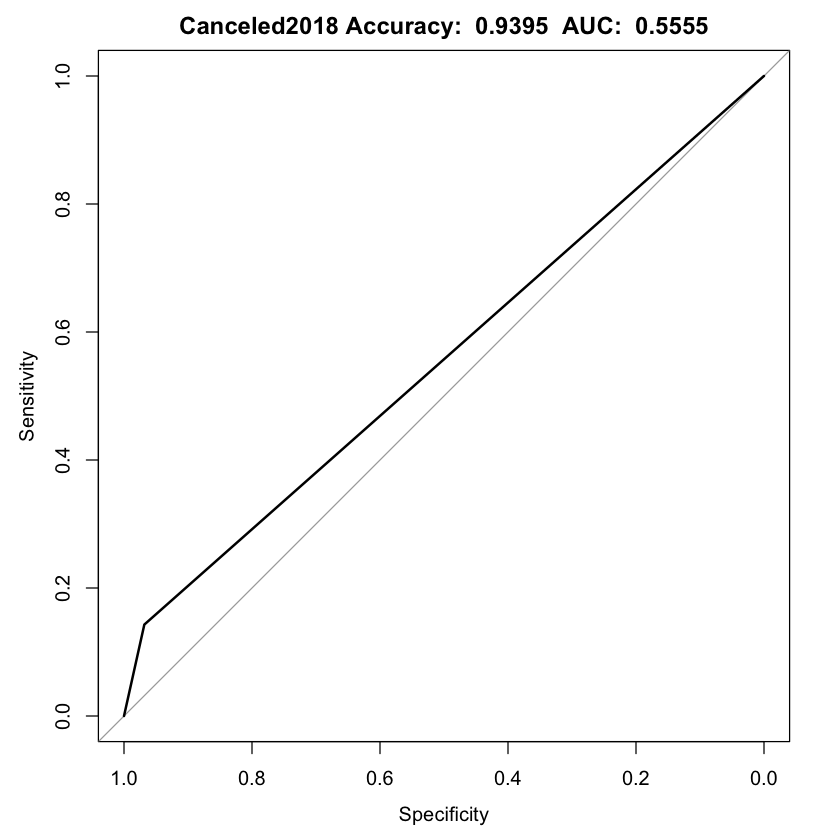

In [354]:
roc_score2 = roc( ytest , pred_cancel2 ) #AUC score
roc_score2
xgb_acc2 <- cmatrix_xgb2$overall[[1]]
xgb_auc2 <- auc(roc_score2)
mytitle2 <- paste("Canceled2018 Accuracy: ", format(xgb_acc2, digits=4), " AUC: ", format(xgb_auc2, digits=4))
plot( roc_score2 , main = mytitle2)

***Conclusion:** eventhough we can improve the Accuracy by increasing our threshold (I tried various thresholds), the Area Under the Curve (AUC) actually decreases, showing that overall the tweaked model performs worse.*

*Also note that if we would just predict that **no customer** would cancel, we would be ~96% accurate (since only 4% of all customers canceled). So our model actually performs worse than the naive constant prediction approach of no cancelations at all.*

*Overall, we reach the conclusion that dealing with data that has a time-series element to it is more challenging than I initially anticipated, especially when we are also dealing with a strong class-imbalance.*